# Import Libraries

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

# Read the data

In [2]:
def parser(s):
    return datetime.strptime(s, '%d-%m-%Y')

In [3]:
#import the data file

data = pd.read_csv(r"C:\Users\User\Dropbox\Study\APPLY\HOME LLC\Assignment 2\FRESH\Home_Price.csv", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
data=data.asfreq(pd.infer_freq(data.index))

In [5]:
data.columns

Index(['POPULATION', 'CPI', 'MORTGAGE RATE', 'MONTHLY INCOME',
       'NO. OF PERMITS', 'S&P PRICE INDEX'],
      dtype='object')

In [6]:
data.shape

(252, 6)

In [7]:
data.head()

,POPULATION,CPI,MORTGAGE RATE,MONTHLY INCOME,NO. OF PERMITS,S&P PRICE INDEX
DATE,,,,,,
2000-01-01,281083,181.1,9.15,4069.25,64,99.85
2000-02-01,281299,181.5,8.83,4069.25,70,100.55
2000-03-01,281531,182.0,8.46,4069.25,65,101.34
2000-04-01,281763,182.3,8.32,4069.25,61,102.13
2000-05-01,281996,182.7,7.96,4069.25,70,102.92


# Plotting the data

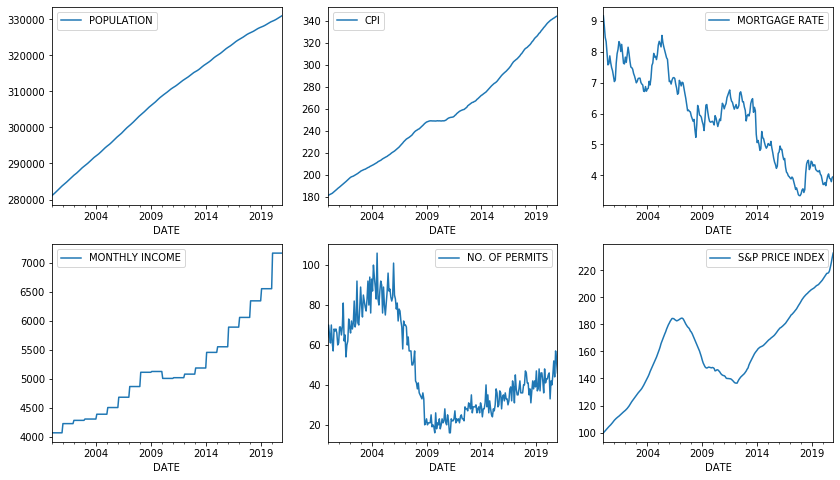

In [8]:
fig,ax = plt.subplots(2,3,figsize=(14,8))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ts_1 = data['POPULATION']
ts_1.plot(ax=ax1, label = 'POPULATION')
ax1.legend(loc = 'best')

ts_2 = data['CPI']
ts_2.plot(ax = ax2, label = 'CPI')
ax2.legend(loc = 'best')

ts_3 = data['MORTGAGE RATE']
ts_3.plot(ax = ax3, label = 'MORTGAGE RATE')
ax3.legend(loc = 'best')

ts_4 = data['MONTHLY INCOME']
ts_4.plot(ax = ax4, label = 'MONTHLY INCOME')
ax4.legend(loc = 'best')

ts_5 = data['NO. OF PERMITS']
ts_5.plot(ax = ax5, label = 'NO. OF PERMITS')
ax5.legend(loc = 'best')

ts_6 = data['S&P PRICE INDEX']
ts_6.plot(ax = ax6, label = 'S&P PRICE INDEX')
ax6.legend(loc = 'best')

# Dickey–Fuller test

In [9]:
adf_test = adfuller(data['POPULATION'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -2.1989436899281483
p-value = 0.20662905984154017
series is not stationary


In [10]:
adf_test = adfuller(data['CPI'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = 1.1217618233447806
p-value = 0.9953981376890156
series is not stationary


In [11]:
adf_test = adfuller(data['MORTGAGE RATE'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -0.9165428180864924
p-value = 0.7824758266326446
series is not stationary


In [10]:
adf_test = adfuller(data['MONTHLY INCOME'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = 2.1747464604077087
p-value = 0.9988610752951655
series is not stationary


In [12]:
adf_test = adfuller(data['NO. OF PERMITS'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -0.9920252193422361
p-value = 0.7561617948842438
series is not stationary


In [13]:
adf_test = adfuller(data['S&P PRICE INDEX'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = 0.1117207668383284
p-value = 0.9668522742624491
series is not stationary


# Normalization

In [14]:
avgs = data.mean()
devs = data.std()

In [21]:
for col in data.columns:
    data[col] = (data[col] - avgs.loc[col]) / (devs.loc[col])

In [22]:
data = data.diff().dropna()

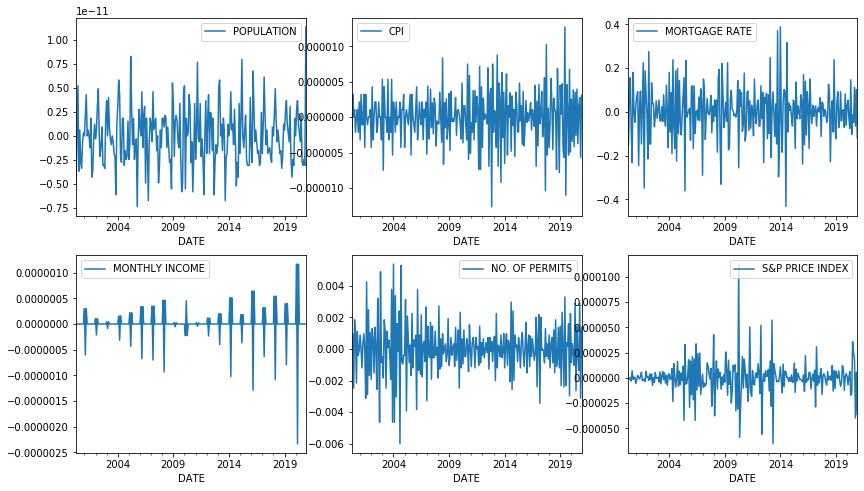

In [23]:
fig,ax = plt.subplots(2,3,figsize=(14,8))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ts_1 = data['POPULATION']
ts_1.plot(ax=ax1, label = 'POPULATION')
ax1.legend(loc = 'best')

ts_2 = data['CPI']
ts_2.plot(ax = ax2, label = 'CPI')
ax2.legend(loc = 'best')

ts_3 = data['MORTGAGE RATE']
ts_3.plot(ax = ax3, label = 'MORTGAGE RATE')
ax3.legend(loc = 'best')

ts_4 = data['MONTHLY INCOME']
ts_4.plot(ax = ax4, label = 'MONTHLY INCOME')
ax4.legend(loc = 'best')

ts_5 = data['NO. OF PERMITS']
ts_5.plot(ax = ax5, label = 'NO. OF PERMITS')
ax5.legend(loc = 'best')

ts_6 = data['S&P PRICE INDEX']
ts_6.plot(ax = ax6, label = 'S&P PRICE INDEX')
ax6.legend(loc = 'best')

In [24]:
adf_test = adfuller(data['POPULATION'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -11.657072166908222
p-value = 1.97370522106226e-21
series is stationary


In [25]:
adf_test = adfuller(data['CPI'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -8.731874526611094
p-value = 3.175508088337184e-14
series is stationary


In [26]:
adf_test = adfuller(data['MORTGAGE RATE'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -8.189090898344183
p-value = 7.75493074078419e-13
series is stationary


In [27]:
adf_test = adfuller(data['MONTHLY INCOME'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -9.578018957934985
p-value = 2.1965595305840694e-16
series is stationary


In [28]:
adf_test = adfuller(data['NO. OF PERMITS'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -10.062924685847975
p-value = 1.3189603134385761e-17
series is stationary


In [29]:
adf_test = adfuller(data['S&P PRICE INDEX'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -11.982136852027327
p-value = 3.683753549074723e-22
series is stationary


All series are stationary now.

# PACF - S&P PRICE INDEX

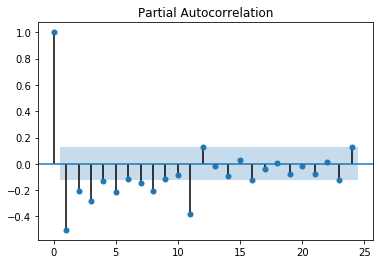

In [30]:
plot_pacf(data['S&P PRICE INDEX'])
plt.show()

# Model

In [31]:
model=VAR(data)
for i in range(48):
    results=model.fit(i+1)
    print('Order= ', i+1)
    print('AIC' ,results.aic)
    print('BIC' ,results.bic)

Order=  1
AIC -149.5777971686104
BIC -148.9827810099857
Order=  2
AIC -150.78796191106196
BIC -149.67973401528468
Order=  3
AIC -151.5885463433282
BIC -149.96412441204248
Order=  4
AIC -152.18558303269643
BIC -150.0419555568527
Order=  5
AIC -152.4520054503973
BIC -149.78613131144428
Order=  6
AIC -152.8269873648888
BIC -149.63579542899743
Order=  7
AIC -153.2857953062095
BIC -149.5661840113813
Order=  8
AIC -153.67987333230337
BIC -149.42871026821103
Order=  9
AIC -153.90456894710732
BIC -149.1186904275121
Order=  10
AIC -154.55518357788333
BIC -149.2313942054694
Order=  11
AIC -155.0426635454975
BIC -149.17773576896
Order=  12
AIC -155.02946730891338
BIC -148.62014097213202
Order=  13
AIC -155.0542529279629
BIC -148.0972348110894
Order=  14
AIC -155.0178275538389
BIC -147.5097909061218
Order=  15
AIC -155.06083422584976
BIC -146.9984182900151
Order=  16
AIC -155.0401554457325
BIC -146.41996497373577
Order=  17
AIC -155.0026928724892
BIC -145.82129763244706
Order=  18
AIC -154.9668300

In [32]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,-146.9,-146.8,1.587e-64,-146.9
1,-149.3,-148.6,1.475e-65,-149.0
2,-150.5,-149.2,4.499e-66,-149.9
3,-151.2,-149.3,2.159e-66,-150.4
4,-151.8,-149.4,1.160e-66,-150.8
5,-152.1,-149.0,9.222e-67,-150.8
6,-152.4,-148.8,6.491e-67,-151.0
7,-152.9,-148.7,3.966e-67,-151.2
8,-153.4,-148.5,2.611e-67,-151.4
9,-153.6,-148.2,2.152e-67,-151.4


In [33]:
model=VAR(data)
results=model.fit(47)

print(results.summary())

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Feb, 2021
Time:                     23:17:56
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -380.211
Nobs:                     202.000    HQIC:                  -396.769
Log likelihood:           41188.3    FPE:               1.44943e-180
AIC:                     -408.020    Det(Omega_mle):    7.56582e-183
--------------------------------------------------------------------
Results for equation POPULATION
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.000000              NAN              NAN             NAN
L1.POPULATION               0.000000         0.000254            0.000           1.000
L1.CPI                     -0.0